IMPORTING ALL NECESSARY PACKAGES. MOST OF THEM ARE ALREADY IN THE ANACONDA DISTRIBUTION

In [53]:
import asyncio
import nest_asyncio
import aiohttp
from understat import Understat
import codecs
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.animation as animation
import subprocess
import os
from highlight_text import ax_text,fig_text
from mplsoccer import (VerticalPitch)
from PIL import Image, ImageFilter, ImageEnhance
from mplsoccer import add_image
from matplotlib.animation import FFMpegWriter

In [54]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [55]:
club="Union Berlin"  # CHANGE CLUB NAME HERE

In [56]:
with open('club_name.txt', 'w') as f:
    f.write(club)
    f.close

In [57]:
team_for_foto=""
if club == "RasenBallsport Leipzig":
    team_for_foto="RB Leipzig"
elif club == "FC Cologne":
    team_for_foto="FC Köln"
elif club== "Augsburg":
    team_for_foto="FC Augsburg"
elif club== "Borussia M.Gladbach":
    team_for_foto="Borussia Mönchengladbach"
else:
    team_for_foto=club
team_for_foto

'Union Berlin'

In [58]:
torneo="2025-2026"

In [59]:
foto_path=f'images/{team_for_foto}.png'

In [60]:
%run -i undesstatteams.py

Union Berlin
[
    {
        "id": "30227",
        "isResult": true,
        "side": "h",
        "h": {
            "id": "240",
            "title": "Union Berlin",
            "short_title": "UNI"
        },
        "a": {
            "id": "133",
            "title": "VfB Stuttgart",
            "short_title": "STU"
        },
        "goals": {
            "h": "2",
            "a": "1"
        },
        "xG": {
            "h": "0.529421",
            "a": "1.80147"
        },
        "datetime": "2025-08-23 13:30:00",
        "forecast": {
            "w": 0.10219946835882875,
            "d": 0.2145142219418066,
            "l": 0.6832863087288216
        },
        "result": "w"
    },
    {
        "id": "30240",
        "isResult": true,
        "side": "a",
        "h": {
            "id": "129",
            "title": "Borussia Dortmund",
            "short_title": "DOR"
        },
        "a": {
            "id": "240",
            "title": "Union Berlin",
            "sh

In [61]:
# Get csv from D://understatteams.py !!!!!
df_understat=pd.read_csv(f'{club}_seasons_shots.csv')

In [62]:
df_understat.head()

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
0,8,0.911,0.438,Andrej Ilic,Head,MissedShots,Union Berlin,VfB Stuttgart,Christopher Trimmel,0.021803
1,17,0.751,0.549,Ilyas Ansah,RightFoot,Goal,Union Berlin,VfB Stuttgart,NaN,0.019161
2,39,0.754,0.574,Robert Skov,LeftFoot,MissedShots,Union Berlin,VfB Stuttgart,NaN,0.032468
3,48,0.862,0.460,Ilyas Ansah,RightFoot,Goal,Union Berlin,VfB Stuttgart,Andrej Ilic,0.073251
4,55,0.851,0.442,Tom Rothe,LeftFoot,MissedShots,Union Berlin,VfB Stuttgart,Robert Skov,0.080010


In [63]:
own_goals_total=len(df_understat[df_understat['result']=='OwnGoal'])
own_goals_total

1

In [64]:
own_goals=df_understat[df_understat['result']=='OwnGoal']
own_goals['xG']=0.5
own_goals

C:\Users\enado\AppData\Local\Temp\ipykernel_4828\1559663483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  own_goals['xG']=0.5


,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
253,46,0.025,0.517,Diogo Leite,RightFoot,OwnGoal,Hoffenheim,Union Berlin,NaN,0.5


In [65]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        players = await understat.get_league_players(
            "bundesliga",
            2025,
            team_title=club
        )
        squad=json.dumps(players, indent=4, ensure_ascii=False)
    with codecs.open(f'{club}_squad.json', "w", "utf-8") as jsonfile:
        jsonfile.write(squad)
        #json.dumps(jamal_json, indent=4)
        jsonfile.close() 

nest_asyncio.apply()
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

squad_df=pd.read_json(f'{club}_squad.json')

In [66]:
squad=squad_df['player_name'].unique()
squad

array(['Ilyas Ansah', 'Rani Khedira', 'Oliver Burke', 'Danilho Doekhi',
       'Woo-Yeong Jeong', 'Marin Ljubicic', 'Stanley N&#039;Soki',
       'Andras Schafer', 'Tom Rothe', 'Tim Skarke', 'Leopold Querfeld',
       'Janik Haberer', 'Frederik Rönnow', 'Robert Skov',
       'Christopher Trimmel', 'Alex Kral', 'Diogo Leite',
       'Aljoscha Kemlein', 'Josip Juranovic', 'Andrej Ilic',
       'Derrick Köhn', 'Livan Burcu'], dtype=object)

In [67]:
"Paul Nebel" in squad

False

In [68]:
own_goals_len=len(own_goals[~own_goals['player'].isin(squad)])
own_goals_len

0

In [69]:
ogf=own_goals[~own_goals['player'].isin(squad)]
ogf

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [70]:
own_goals_for=0
for player in own_goals['player']:
    if player not in squad:
        own_goals_for+=1
own_goals_for

0

In [71]:
# THE X AND Y LABELS ARE SCALED BETWEEN 0 and 1. SINCE WE WILL BE USING OPTA AXES WHICH GO FROM 100 to 100, WE NEED TO
# SCALE BOTH THESE UPTO 100

df_understat['X'] = df_understat['X'].apply(lambda x:x*100)
df_understat['Y'] = df_understat['Y'].apply(lambda x:x*100)

#df_understat['result'].unique()

In [72]:
df_understat[df_understat['result']=='OwnGoal']

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG
253,46,2.5,51.700001,Diogo Leite,RightFoot,OwnGoal,Hoffenheim,Union Berlin,NaN,0.0


In [73]:
#pip install mplsoccer
#pip install highlight-text

WE WILL CHANGE SOME OF THE BASIC PARAMETERS USING THE rcParams method OF MPL

In [74]:
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Franklin Gothic Medium Cond'
mpl.rcParams['legend.fontsize'] = 12


In [75]:
#mpl.font_manager.FontManager.get_font_names(mpl)
ogf

,minute,X,Y,player,shotType,result,h_team,a_team,player_assisted,xG


In [76]:
#if torch.cuda.is_available():
 #   device = torch.device("cuda")
#else:
 #   device = torch.device("cpu")
    
#print("using", device, "device")

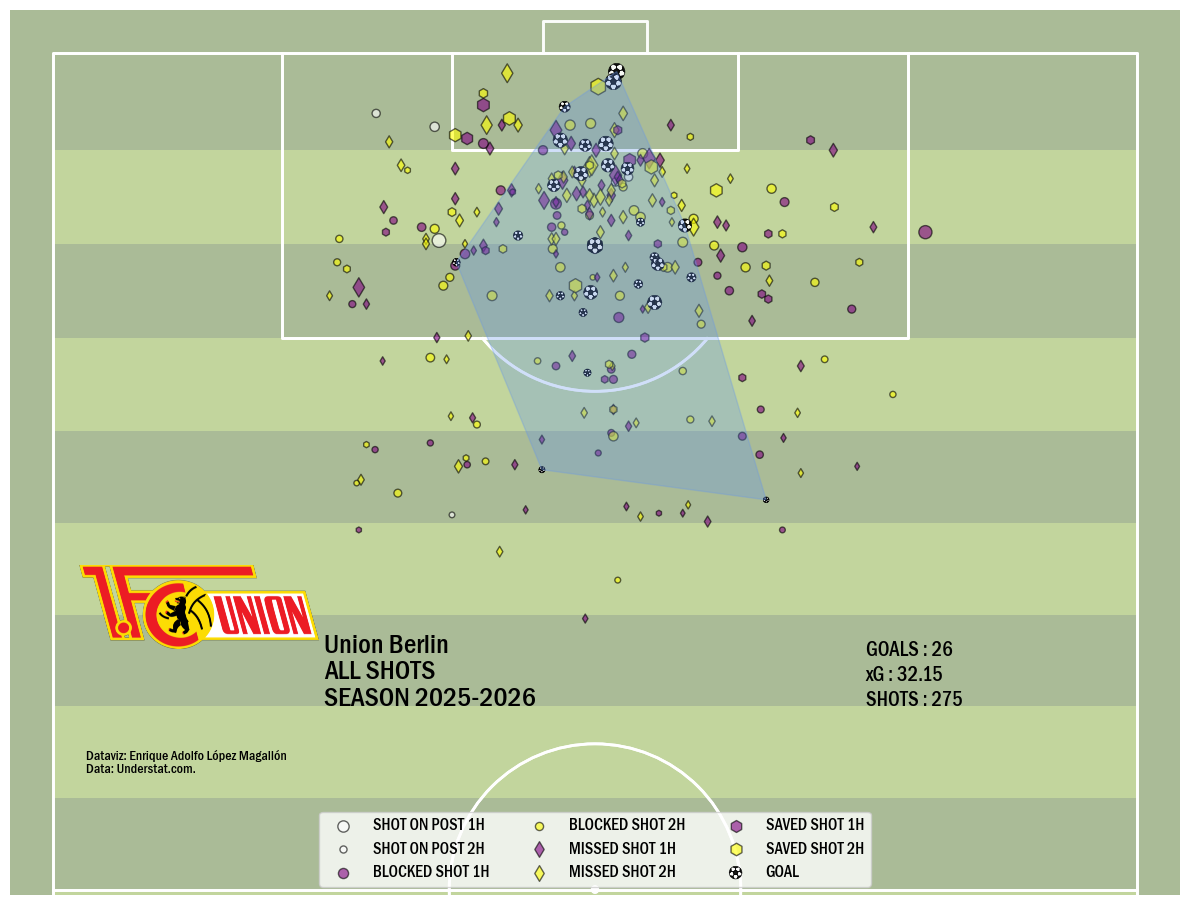

In [77]:
# SETTING UP THE AXES
#fig, ax = plt.subplots(figsize=(10,12))
#ax.axis('off')
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST TEAM
pitch = pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line 
    half=True,  # half of a pitch
    goal_type='box',
    goal_alpha=0.8, 
    pitch_type='opta',
    pitch_color='#aabb97',
    stripe=True,
    stripe_color='#c2d59d',
    line_color='white')  

fig, ax = pitch.draw(figsize=(12, 10))

#PLOTTING HTEAM
#df_fil = df_understat.loc[df_understat['HomeAway']=='h']
df_fil = df_understat
#df_hOG = df_fil[df_fil['HomeAway']=='a']
#df_fil = df_a
#df_hOG = df_fil[df_fil['HomeAway']=='h']
df_h1H = df_fil[df_fil['minute']<=45]
df_h2H = df_fil[df_fil['minute']>45]

#PLOTTING SHOTS TEAM 1 PER TYPE AND HALF.LABELS APPEAR ONLY IF VARIABLE IS FILLED


if "ShotOnPost" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='ShotOnPost']['X'],df_h1H[df_h1H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 1H")

if "ShotOnPost" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='ShotOnPost']['X'],df_h2H[df_h2H['result']=='ShotOnPost']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='ShotOnPost']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='white', ax=ax, label="SHOT ON POST 2H")
    
if "BlockedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='BlockedShot']['X'],df_h1H[df_h1H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="BLOCKED SHOT 1H")

if "BlockedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='BlockedShot']['X'],df_h2H[df_h2H['result']=='BlockedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='BlockedShot']['xG'])*150, marker='o', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="BLOCKED SHOT 2H")

if "MissedShots" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='MissedShots']['X'],df_h1H[df_h1H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="MISSED SHOT 1H")

if "MissedShots" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='MissedShots']['X'],df_h2H[df_h2H['result']=='MissedShots']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='MissedShots']['xG'])*150, marker='d', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="MISSED SHOT 2H")
    
if "SavedShot" in iter(df_h1H['result']):
    pitch.scatter(df_h1H[df_h1H['result']=='SavedShot']['X'],df_h1H[df_h1H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h1H[df_h1H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='purple', ax=ax, label="SAVED SHOT 1H")

if "SavedShot" in iter(df_h2H['result']):
    pitch.scatter(df_h2H[df_h2H['result']=='SavedShot']['X'],df_h2H[df_h2H['result']=='SavedShot']['Y'], 
              s=np.sqrt(df_h2H[df_h2H['result']=='SavedShot']['xG'])*150, marker='h', alpha=0.6,
              edgecolors='black', facecolor='yellow', ax=ax, label="SAVED SHOT 2H")
    


#NOW PLOTTING THE GOALS
if "Goal" in iter(df_fil['result']):
    pitch.scatter(df_fil[df_fil['result']=='Goal']['X'],df_fil[df_fil['result']=='Goal']['Y'], 
              s=np.sqrt(df_fil[df_fil['result']=='Goal']['xG'])*150, marker='football', alpha=0.9,
              edgecolors='black', facecolor='red', ax=ax, label="GOAL")
    hull=pitch.convexhull(df_fil[df_fil['result']=='Goal']['X'], df_fil[df_fil['result']=='Goal']['Y'])
    pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)

if "OwnGoal" in iter(ogf['result']):
    pitch.scatter(100-ogf[ogf['result']=='OwnGoal']['X']*100,100-ogf[df_fil['result']=='OwnGoal']['Y']*100, 
              s=np.sqrt(ogf[ogf['result']=='OwnGoal']['xG'])*150, marker='x', alpha=0.9,
              edgecolors='red', facecolor='red', ax=ax, label="OWN GOAL FOR")
    #hull=pitch.convexhull(df_fil[df_fil['result']=='OwnGoal']['X'], df_fil[df_fil['result']=='OwnGoal']['Y'])
    #pitch.polygon(hull, ax=ax, edgecolor='cornflowerblue', facecolor='cornflowerblue', alpha=0.3)
#OWNGOALS
#if len(df_hOG) >0:
 #   pitch.scatter(df_hOG[df_hOG['result']=='Goal']['X'],df_hOG[df_hOG['result']=='Goal']['Y'], 
  #            s=np.sqrt(df_hOG[df_hOG['result']=='Goal']['xG'])*150, marker='x', alpha=0.9,
   #           edgecolors='black', facecolor='orange', ax=ax_opta1, label='AUTOGOL DEL RIVAL')


# ADDING THE LEGEND
ax.legend(loc='lower center', ncol=3)#.get_texts()[0].set_color("black")

ax.text(25,64,'GOALS : '+str(len(df_fil[df_fil['result']=='Goal'])+ int(own_goals_for)), weight='bold', size=15)
ax.text(25,62.5,f"xG : {round(sum(df_fil['xG']),2)}", weight='bold', size=15)
ax.text(25,61,'SHOTS : '+str(len(df_fil)), weight='bold', size=15)
ax.text(75, 61, f'{team_for_foto}\nALL SHOTS\nSEASON {torneo}', weight='bold', size=20)

# Use a direct file path instead of urlopen for local files
image_path = foto_path

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    image = Image.open(image_path)
    ax_image = add_image(image, fig, left=0.07, bottom=0.245, width=0.2, height=0.2)
else:
    print(f"Warning: Image file not found at {image_path}")
    # Optionally continue without the image


pitch.draw(ax=ax)

# ADDING A FOOTER
ax.text(97,57,'Dataviz: Enrique Adolfo López Magallón\nData: Understat.com.')# Comparison with <forwards>'+
 #       ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).',
  #      size=12, highlight_textprops=[{'color':'#EF8804'}], weight = 'bold')


#EXPORT TO IMG

plt.savefig(f'{club}_shots.png',dpi=300,facecolor=background)

In [78]:
#%run -i optimize_animation.py